In [1]:
# svm log reg random forest

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

housing_df = pd.read_csv('~/Documents/datacamp/WBS-School/wbs-housing-iter-0-2/iter-6/housing-classification-iter6.csv')



In [3]:
# housing_df.info()

In [4]:
housing_df.drop(['GarageYrBlt'],inplace=True,axis=1)

In [5]:
#  replace outliers from MiscVal column
# df[df.a < np.percentile(df.a,95)]
# df2.loc[df2['Values'].isin(df1['Values']), 'Values'] = 'Other'
df = housing_df
df.loc[df.MiscVal < np.percentile(df.MiscVal,95), 'MiscVal'] = np.mean(df.MiscVal)


housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [6]:
housing_df.shape

(1460, 80)

In [7]:
X = housing_df.copy()


In [8]:
# X.drop('Floor',inplace=True)

In [9]:
# target
y = X.pop("Expensive")

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)



In [11]:
# helper
def to_df(arr,df):
    print(arr.shape)
    print(df.shape)
    return pd.DataFrame(arr, columns=df.columns, index=df.index)



In [12]:
from sklearn.impute import SimpleImputer

# selecting non-numerical columns
X_train_cat = X_train.select_dtypes(exclude="number")

# defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant", 
                            fill_value="N_A")#.set_output(transform='pandas')

# fitting and transforming
X_cat_imputed = cat_imputer.fit_transform(X_train_cat)
X_cat_imputed = to_df(X_cat_imputed,X_train_cat)



(1168, 43)
(1168, 43)


In [13]:
# Selecting numerical columns
X_train_num = X_train.select_dtypes(include="number")

# Imputing the mean
num_imputer = SimpleImputer(strategy="mean")#.set_output(transform='pandas')

# Fitting and transforming
X_num_imputed = num_imputer.fit_transform(X_train_num)
X_num_imputed = to_df(X_num_imputed,X_train_num)
X_num_imputed.head()

(1168, 36)
(1168, 36)


,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSSubClass,...,KitchenAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
772,7819.0,94.00000,1029.0,3.0,1.0,0.0,2.0,144.0,0.0,80.0,...,1.0,6.0,672.0,0.0,0.0,0.0,0.0,3.0,2010.0,773.0
157,12003.0,92.00000,774.0,4.0,1.0,0.0,3.0,0.0,0.0,60.0,...,1.0,8.0,680.0,75.0,0.0,0.0,0.0,5.0,2010.0,158.0
360,7540.0,70.10352,888.0,2.0,1.0,0.0,2.0,0.0,192.0,85.0,...,1.0,5.0,470.0,0.0,0.0,0.0,0.0,6.0,2007.0,361.0
744,5395.0,41.00000,1337.0,2.0,1.0,0.0,2.0,96.0,0.0,120.0,...,1.0,5.0,462.0,0.0,70.0,168.0,0.0,10.0,2008.0,745.0
150,10356.0,120.00000,969.0,3.0,0.0,0.0,2.0,0.0,0.0,20.0,...,1.0,5.0,440.0,0.0,0.0,0.0,0.0,1.0,2007.0,151.0


In [14]:
from sklearn.preprocessing import OneHotEncoder

# initialize
# my_onehot = OneHotEncoder(drop="first",sparse_output=False).set_output(transform='pandas')
my_onehot = OneHotEncoder(handle_unknown='ignore')
# fit
my_onehot.fit(X_cat_imputed)

# transform
X_cat_imputed_mat = my_onehot.transform(X_cat_imputed)

In [15]:
import scipy.sparse
X_cat_imputed_onehot = pd.DataFrame.sparse.from_spmatrix(X_cat_imputed_mat)
X_imputed = pd.concat([X_cat_imputed_onehot, X_num_imputed], axis=1)

X_imputed.head(3)

,0,1,2,3,4,5,6,7,8,9,...,KitchenAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,8.0,548.0,61.0,0.0,0.0,0.0,2.0,2008.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,6.0,460.0,0.0,0.0,0.0,0.0,5.0,2007.0,2.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,6.0,608.0,42.0,0.0,0.0,0.0,9.0,2008.0,3.0


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
stscaler = StandardScaler()
mmscaler = MinMaxScaler()

In [17]:
from sklearn.pipeline import make_pipeline

# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").copy().columns
X_num_columns = X.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    stscaler
)

# create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    # OneHotEncoder(sparse_output=False)
    OneHotEncoder()
)

In [18]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns),
    ]
)

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay



In [20]:
from sklearn.model_selection import KFold

kfold_validation=KFold(10)



In [44]:
from sklearn.model_selection import GridSearchCV

rforest = RandomForestClassifier()
full_pipeline = make_pipeline(preprocessor, rforest)
# k_range = list(range(1, 10))

rfor_grid = {'randomforestclassifier__n_estimators': [100, 150, 200, 250, 300],
              'randomforestclassifier__max_depth': [3,5,7,11],
              'randomforestclassifier__max_features':['sqrt', 'log2', None]
             }
rfreg_grid = {'randomforestregressor__n_estimators': [100, 150, 200, 250, 300],
              'randomforestregressor__max_depth': [3,5,7,11],
              'randomforestregressor__max_features':['sqrt', 'log2', None]
             }

param_grid = rfor_grid

crossval = 10

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=crossval,
                      verbose=0,
                      scoring='r2'
                     )



In [ ]:
search.fit(X_train, y_train)

In [ ]:
# search.get_params().keys()

In [46]:
search.best_score_

nan

In [47]:
# y_test_pred = search.predict(X_test)
y_train_pred = search.predict(X_train)

print('train grid score:',accuracy_score(y_train, y_train_pred))


train grid score: 0.9323630136986302


In [48]:

# print("Baseline score = ", r2_score(y_test, y_test_mean))
print('R2 test score:',r2_score(y_train, y_train_pred))

R2 test score: 0.4787805525585914


In [ ]:
# y_test_pred = search.predict(X_test)

# print(' test score:',accuracy_score(y_test, y_test_pred))


In [ ]:

# print("Baseline score = ", r2_score(y_test, y_test_mean))
# print('R2 test score:',r2_score(y_test, y_test_pred))

In [49]:
search.best_params_

{'randomforestclassifier__max_depth': 3,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 100}

In [50]:
from sklearn.metrics import mean_squared_error as MSE
# Compute mse_dt train set
mse_dtree = MSE(y_train, y_train_pred)

# Compute rmse_dt
rmse_dtree = mse_dtree**(1/2)

# Print rmse_dt
print("Train set RMSE of dtree: {:.2f}".format(rmse_dtree))

Train set RMSE of dtree: 0.26


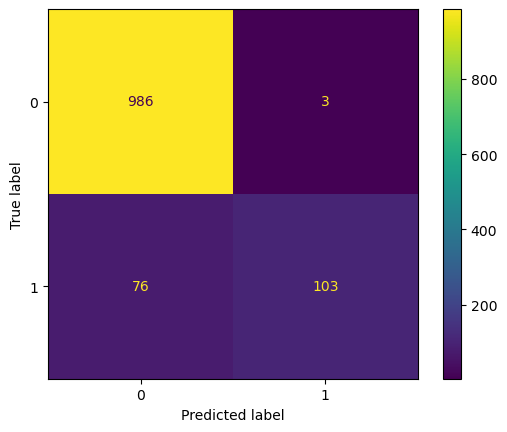

In [51]:
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
search.fit(X_test, y_test)

In [53]:
y_test_pred = search.predict(X_test)

print('test set grid score:',accuracy_score(y_test, y_test_pred))



test set grid score: 0.934931506849315


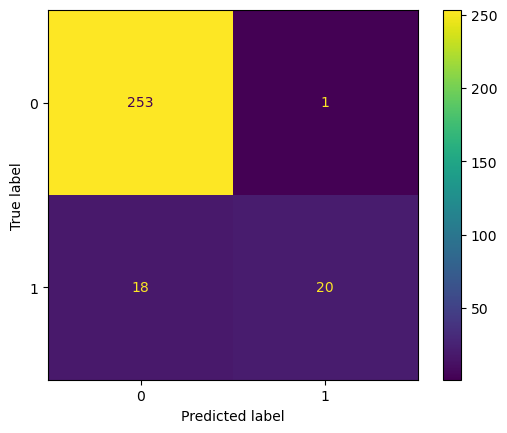

In [54]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
full_pipeline.fit(X_train, y_train)

In [56]:
y_train_pred = full_pipeline.predict(X_train)

accuracy_score(y_train, y_train_pred)

1.0

In [ ]:
full_pipeline.fit(X_test, y_test)

In [58]:
y_test_pred = full_pipeline.predict(X_test)

accuracy_score(y_test, y_test_pred)

1.0

In [ ]:
# ppl = sns.pairplot(X_train)

In [ ]:
# ppl.savefig("housing.png") 

In [ ]:
# https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

In [ ]:
# final model params

In [ ]:
# 'randomforestclassifier__max_depth': 3,
#  'randomforestclassifier__max_features': 'sqrt',
#  'randomforestclassifier__n_estimators': 100}